In [4]:
import pandas as pd
import matplotlib.pyplot as plt

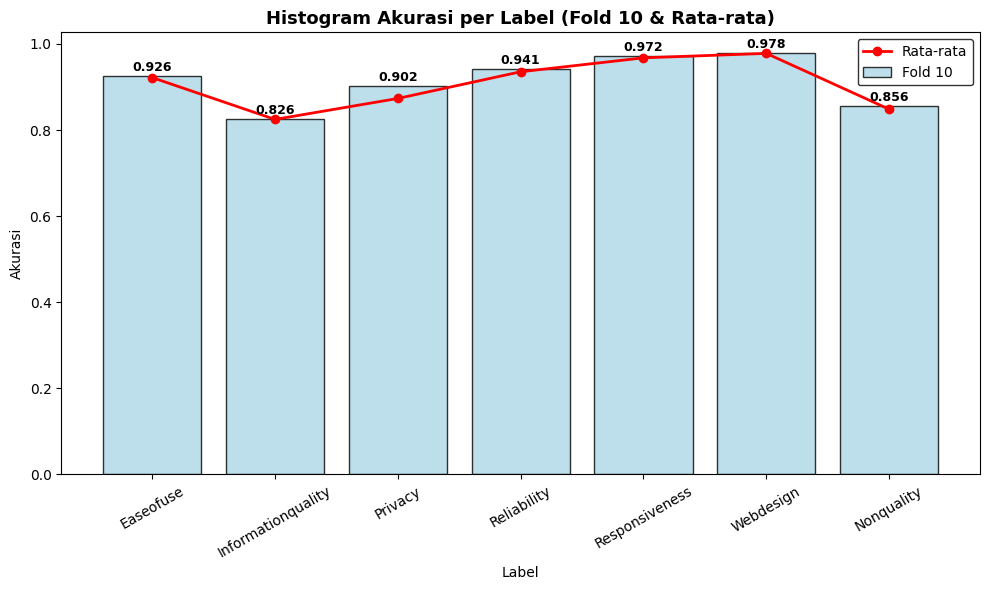

In [ ]:
data = {
    'Kernel': ['Linear']*21,
    'Fold': [3]*7 + [5]*7 + [10]*7,
    'Label': ['Easeofuse','Informationquality','Privacy','Reliability','Responsiveness','Webdesign','Nonquality']*3,
    'Akurasi': [0.9105,0.824,0.830,0.928,0.962,0.978,0.841,
                0.929,0.824,0.888,0.937,0.969,0.978,0.848,
                0.926,0.826,0.902,0.9409,0.972,0.978,0.856]
}
    
df = pd.DataFrame(data)

# Urutan label yang diinginkan
label_order = ['Easeofuse','Informationquality','Privacy','Reliability','Responsiveness','Webdesign','Nonquality']

# Pastikan urutannya benar
df['Label'] = pd.Categorical(df['Label'], categories=label_order, ordered=True)

# Hitung rata-rata per label dan urutkan
avg_acc = df.groupby('Label', observed=True)['Akurasi'].mean().reset_index().sort_values('Label')

# Ambil data fold=10
fold10 = df[df['Fold'] == 10].sort_values('Label')

plt.figure(figsize=(10,6))

# Bar chart
bars = plt.bar(fold10['Label'], fold10['Akurasi'], color='lightblue', edgecolor='black', alpha=0.8, label='Fold 10')

# Garis rata-rata — akan mengikuti urutan label_order
plt.plot(avg_acc['Label'], avg_acc['Akurasi'], color='red', marker='o', linewidth=2, label='Rata-rata')

# Nilai di atas batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.3f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

# Judul dan label
plt.title('Histogram Akurasi per Label (Fold 10 & Rata-rata)', fontsize=13, fontweight='bold')
plt.xlabel('Label')
plt.ylabel('Akurasi')
plt.xticks(rotation=30)

# Legenda di dalam grafik
plt.legend(loc='upper right', frameon=True, facecolor='white', edgecolor='black')

plt.tight_layout()
plt.show()